In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
# Loads second dataset
df2 = pd.read_csv("April26_Dataset_17172_13_Argumented.csv")

In [ ]:
df2.info()

In [ ]:
df2.shape

In [ ]:
df2.describe()

In [ ]:
df2.head()

In [ ]:
# print unique values in the column
columns = df2.columns
for col in columns:
    print(col)
    print(df2[col].unique())

In [67]:
labeled_df = df2.copy()

In [81]:
# print unique values in the column
columns = labeled_df.columns
for col in columns:
    print(col)
    print(labeled_df[col].unique())

location_name
['Rural' 'Urban']
home_language
['English' nan 'Kiswahili' 'Native language']
hh_occupation
[nan 'Private sector' 'Agriculture' 'Self-employed' 'Unemployed'
 'Public sector' 'Housewife']
hh_edu
['Primary' 'None' 'Postsecondary' 'Secondary']
hh_size
['More than five' 'Three Children' 'Five Children' 'Two Children'
 'Four Children']
school_distanceKm
['1-2 km', '0-0.5 km', '0.5-1 km', '2-3 km', '6-7 km', 'More than 11 km', '4-5 km', '7-10 km']
Categories (8, object): ['0-0.5 km' < '0.5-1 km' < '1-2 km' < '2-3 km' < '4-5 km' < '6-7 km' < '7-10 km' < 'More than 11 km']
age
[11 12 13 14 15 16]
gender
['Female' 'Male']
mothers_edu
['Primary' 'Secondary' 'Postsecondary' 'None']
grade
['Form Three' 'Form One' 'Form Two' 'Form Four']
meansToSchool
['Walk' 'Bicycle/motorbike' 'Public transport' 'Private car']
hh_children
['More than five' 'Five Children' 'Four Children' 'Three Children'
 'Two Children']
dropout
[1 0]


In [69]:
#  remove hh_size rows with value > 18
labeled_df = labeled_df[labeled_df['hh_size'] <= 18]

#  remove school_distanceKM rows with value > 30
labeled_df = labeled_df[labeled_df['school_distanceKm'] <= 30]

# remove hh_children rows with value > 13
labeled_df = labeled_df[labeled_df['hh_children'] <= 13]

In [70]:
# map values of hh_children to 0 = 'None', 1 = 'Two Children', 2 = 'Three Children', 3 = 'Four', 4 = 'Five', else 5 = 'More than five'
# Define the mapping
mapping = {0: 'None', 1: 'Two Children', 2: 'Three Children', 3: 'Four Children', 4: 'Five Children'}

# Apply the mapping to the hh_children column
labeled_df['hh_children'] = labeled_df['hh_children'].map(mapping).fillna('More than five')

In [80]:
mapping = {0: 'None', 1: 'Two Children', 2: 'Three Children', 3: 'Four Children', 4: 'Five Children'}

# Apply the mapping to the hh_children column
labeled_df['hh_size'] = labeled_df['hh_size'].map(mapping).fillna('More than five')

In [73]:
# Define the bins and labels
bins = [-1, 0.5, 1, 2, 3, 5, 7, 10, float('inf')]
labels = [1, 2, 3, 4, 5, 6, 7, 8]

# Convert school_distanceKm to categorical
labeled_df['school_distanceKm'] = pd.cut(labeled_df['school_distanceKm'], bins=bins, labels=labels)

In [83]:
labeled_df.head()

,location_name,home_language,hh_occupation,hh_edu,hh_size,school_distanceKm,age,gender,mothers_edu,grade,meansToSchool,hh_children,dropout
0,Rural,English,NaN,Primary,More than five,1-2 km,11,Female,Primary,Form Three,Walk,More than five,Yes
1,Rural,English,NaN,Primary,More than five,0-0.5 km,11,Female,Primary,Form One,Walk,More than five,Yes
2,Rural,NaN,NaN,Primary,More than five,0.5-1 km,11,Female,Primary,Form Two,Walk,More than five,Yes
3,Urban,NaN,Private sector,Primary,More than five,1-2 km,11,Female,Primary,Form Three,Walk,Five Children,No
4,Urban,NaN,NaN,None,More than five,0.5-1 km,11,Male,Secondary,Form One,Walk,More than five,Yes


In [77]:
# Define the mappings
gender_mapping = {1: 'Male', 2: 'Female'}
home_language_mapping = {1: 'Kiswahili', 2: 'English', 3: 'Native language'}
hh_occupation_mapping = {1: 'Unemployed', 2: 'Agriculture', 3: 'Self-employed', 4: 'Public sector', 5: 'Private sector', 6: 'Housewife'}
# hh_children_mapping = {0: 'None', 1: 'Two Children', 2: 'Three Children', 3: 'Four', 4: 'Five', 5: 'More than five'}
mothers_edu_mapping = {0: 'None', 1: 'Primary', 2: 'Secondary', 3: 'Postsecondary'}
hh_edu_mapping = {0: 'None', 1: 'Primary', 2: 'Secondary', 3: 'Postsecondary'}
meansToSchool_mapping = {0: 'Walk', 1: 'Bicycle/motorbike', 2: 'Public transport', 3: 'Private car'}
location_name_mapping = {0: 'Rural', 1: 'Urban'}
grade_mapping = {9: 'Form One', 10: 'Form Two', 11: 'Form Three', 12: 'Form Four'}
dropout_mapping = {0: 'No', 1: 'Yes'}
school_distance_mapping = {1: '0-0.5 km', 2: '0.5-1 km', 3: '1-2 km', 4: '2-3 km', 5: '4-5 km', 6: '6-7 km', 7: '7-10 km', 8: 'More than 11 km'}


# Apply the mappings
labeled_df['gender'] = labeled_df['gender'].map(gender_mapping)
labeled_df['home_language'] = labeled_df['home_language'].map(home_language_mapping)
labeled_df['hh_occupation'] = labeled_df['hh_occupation'].map(hh_occupation_mapping)
# labeled_df['hh_children'] = labeled_df['hh_children'].map(hh_children_mapping)
labeled_df['mothers_edu'] = labeled_df['mothers_edu'].map(mothers_edu_mapping)
labeled_df['hh_edu'] = labeled_df['hh_edu'].map(hh_edu_mapping)
labeled_df['meansToSchool'] = labeled_df['meansToSchool'].map(meansToSchool_mapping)
labeled_df['location_name'] = labeled_df['location_name'].map(location_name_mapping)
labeled_df['grade'] = labeled_df['grade'].map(grade_mapping)
labeled_df['school_distanceKm'] = labeled_df['school_distanceKm'].map(school_distance_mapping)
# labeled_df['dropout'] = labeled_df['dropout'].map(dropout_mapping)

# Display the head of the DataFrame
labeled_df.head()

,location_name,home_language,hh_occupation,hh_edu,hh_size,school_distanceKm,age,gender,mothers_edu,grade,meansToSchool,hh_children,dropout
0,Rural,English,NaN,Primary,7,1-2 km,11,Female,Primary,Form Three,Walk,More than five,1
1,Rural,English,NaN,Primary,8,0-0.5 km,11,Female,Primary,Form One,Walk,More than five,1
2,Rural,NaN,NaN,Primary,8,0.5-1 km,11,Female,Primary,Form Two,Walk,More than five,1
3,Urban,NaN,Private sector,Primary,5,1-2 km,11,Female,Primary,Form Three,Walk,Five Children,0
4,Urban,NaN,NaN,None,11,0.5-1 km,11,Male,Secondary,Form One,Walk,More than five,1


In [84]:
# print unique values in the column
columns = labeled_df.columns
for col in columns:
    print(col)
    print(labeled_df[col].unique())

location_name
['Rural' 'Urban']
home_language
['English' nan 'Kiswahili' 'Native language']
hh_occupation
[nan 'Private sector' 'Agriculture' 'Self-employed' 'Unemployed'
 'Public sector' 'Housewife']
hh_edu
['Primary' 'None' 'Postsecondary' 'Secondary']
hh_size
['More than five' 'Three Children' 'Five Children' 'Two Children'
 'Four Children']
school_distanceKm
['1-2 km', '0-0.5 km', '0.5-1 km', '2-3 km', '6-7 km', 'More than 11 km', '4-5 km', '7-10 km']
Categories (8, object): ['0-0.5 km' < '0.5-1 km' < '1-2 km' < '2-3 km' < '4-5 km' < '6-7 km' < '7-10 km' < 'More than 11 km']
age
[11 12 13 14 15 16]
gender
['Female' 'Male']
mothers_edu
['Primary' 'Secondary' 'Postsecondary' 'None']
grade
['Form Three' 'Form One' 'Form Two' 'Form Four']
meansToSchool
['Walk' 'Bicycle/motorbike' 'Public transport' 'Private car']
hh_children
['More than five' 'Five Children' 'Four Children' 'Three Children'
 'Two Children']
dropout
['Yes' 'No']


In [85]:
labeled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204929 entries, 0 to 206883
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   location_name      204929 non-null  object  
 1   home_language      71232 non-null   object  
 2   hh_occupation      187306 non-null  object  
 3   hh_edu             204929 non-null  object  
 4   hh_size            204929 non-null  object  
 5   school_distanceKm  204929 non-null  category
 6   age                204929 non-null  int64   
 7   gender             204929 non-null  object  
 8   mothers_edu        204929 non-null  object  
 9   grade              204929 non-null  object  
 10  meansToSchool      204929 non-null  object  
 11  hh_children        204929 non-null  object  
 12  dropout            204929 non-null  object  
dtypes: category(1), int64(1), object(11)
memory usage: 20.5+ MB


In [86]:
labeled_df.dropna(inplace=True)

In [87]:
labeled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62739 entries, 101 to 206883
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   location_name      62739 non-null  object  
 1   home_language      62739 non-null  object  
 2   hh_occupation      62739 non-null  object  
 3   hh_edu             62739 non-null  object  
 4   hh_size            62739 non-null  object  
 5   school_distanceKm  62739 non-null  category
 6   age                62739 non-null  int64   
 7   gender             62739 non-null  object  
 8   mothers_edu        62739 non-null  object  
 9   grade              62739 non-null  object  
 10  meansToSchool      62739 non-null  object  
 11  hh_children        62739 non-null  object  
 12  dropout            62739 non-null  object  
dtypes: category(1), int64(1), object(11)
memory usage: 6.3+ MB


In [91]:
categorical_columns = labeled_df.select_dtypes(include=['object', 'category']).columns
numerical_columns = labeled_df.select_dtypes(include=['int64', 'float64']).columns

In [92]:
categorical_columns, numerical_columns

(Index(['location_name', 'home_language', 'hh_occupation', 'hh_edu', 'hh_size',
        'school_distanceKm', 'gender', 'mothers_edu', 'grade', 'meansToSchool',
        'hh_children', 'dropout'],
       dtype='object'),
 Index(['age'], dtype='object'))

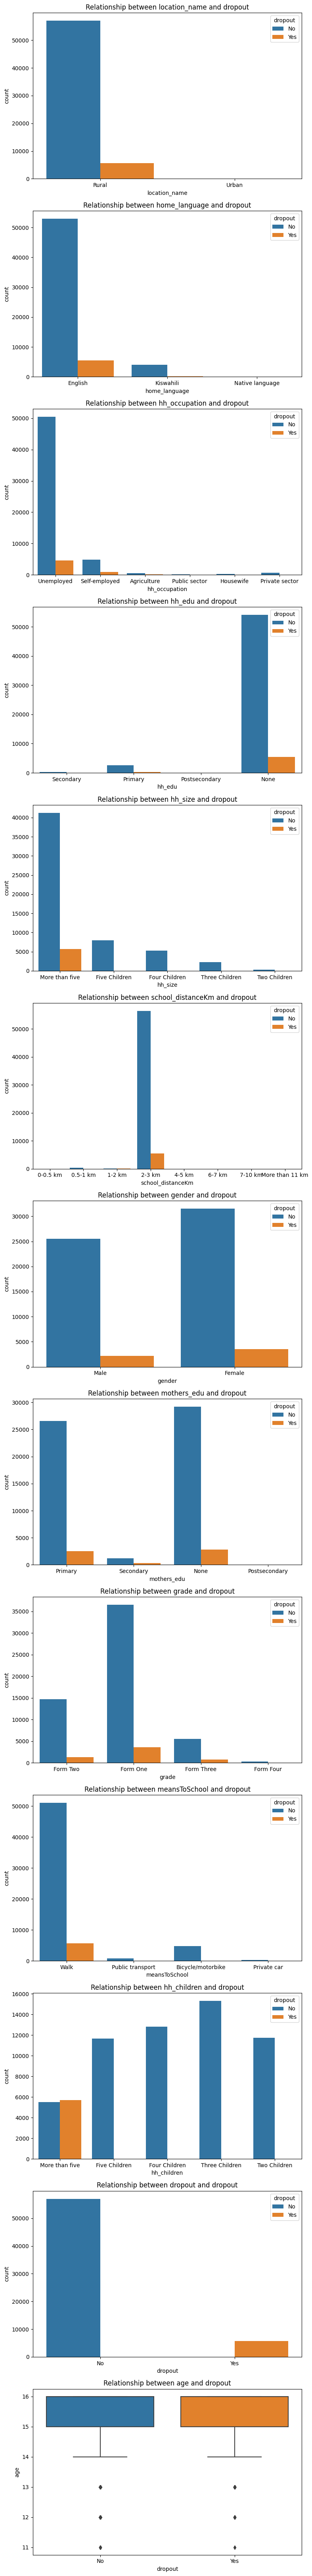

In [93]:
# Calculate the number of rows and columns for the grid
grid_rows = len(categorical_columns) + len(numerical_columns)
grid_cols = 2

fig, axs = plt.subplots(grid_rows, grid_cols, figsize=(15, 5 * grid_rows))

# Loop through all categorical columns
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue='dropout', data=labeled_df, ax=axs[i, 0])
    axs[i, 0].set_title(f'Relationship between {col} and dropout')

# Loop through all numerical columns
for i, col in enumerate(numerical_columns):
    sns.boxplot(x='dropout', y=col, data=labeled_df, ax=axs[i + len(categorical_columns), 0])
    axs[i + len(categorical_columns), 0].set_title(f'Relationship between {col} and dropout')

# Remove unused subplots
for i in range(grid_rows):
    fig.delaxes(axs[i, 1])

plt.tight_layout()
plt.show()

In [ ]:
labeled_df.columns

In [94]:
def plot_count_by_column(df, column):
    # Get unique values in the column
    unique_values = df[column].unique()
    try:
        unique_values.sort()
    except:
        pass
    # Calculate the number of rows and columns for the grid
    grid_size = int(np.ceil(np.sqrt(len(unique_values))))

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(15, 15))

    # Loop through all unique values
    for i, value in enumerate(unique_values):
        # Calculate the row and column index for the subplot
        row = i // grid_size
        col = i % grid_size

        # Filter the DataFrame for only the current value
        filtered_df = df[df[column] == value]

        # Create a count plot for dropout
        filtered_df['dropout'].value_counts().plot(kind='bar', ax=axs[row, col])
        axs[row, col].set_title(f'{column} = {value}')
        axs[row, col].set_xlabel('Dropout')
        axs[row, col].set_ylabel('Count')

    # Remove unused subplots
    for j in range(i+1, grid_size*grid_size):
        fig.delaxes(axs.flatten()[j])

    plt.tight_layout()
    plt.show()

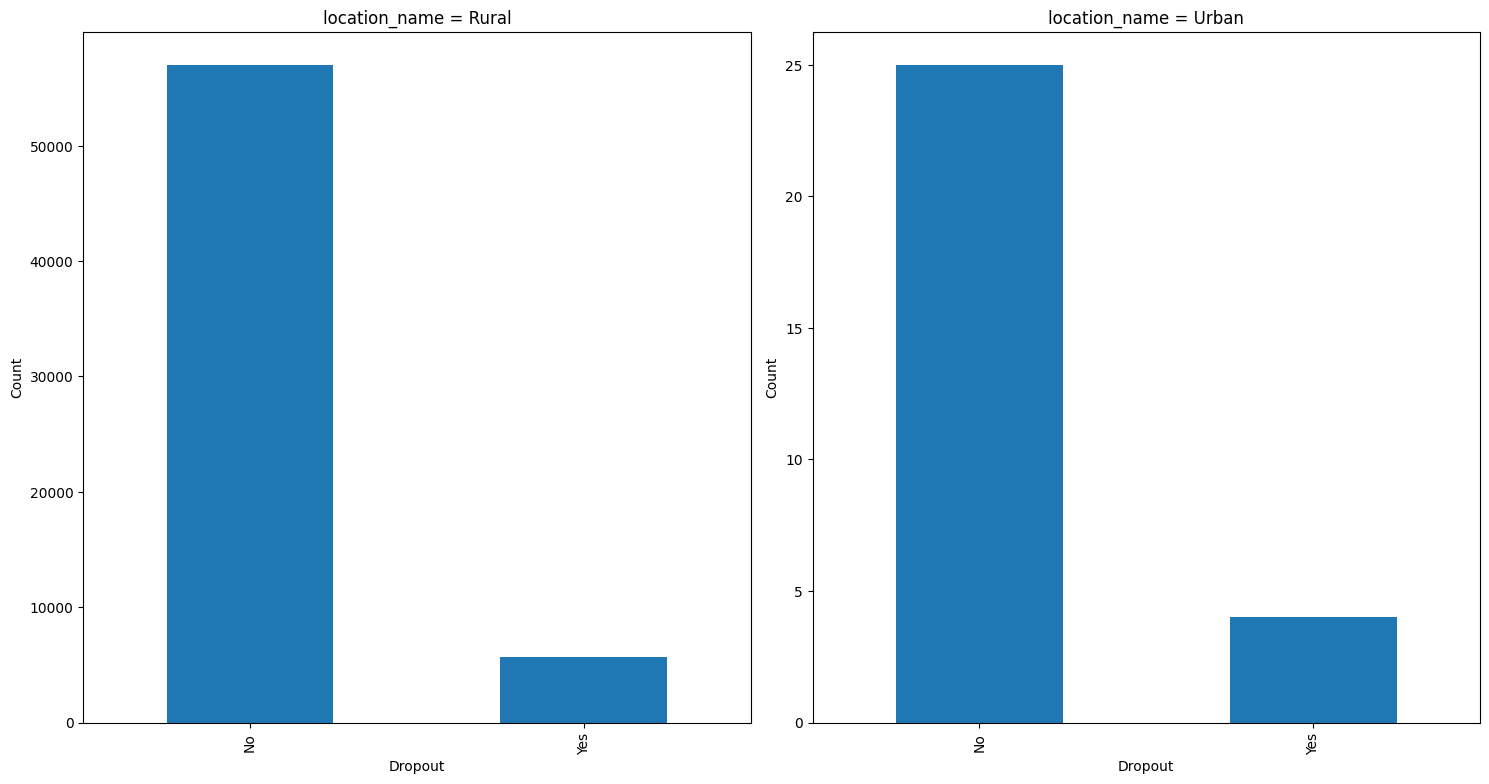

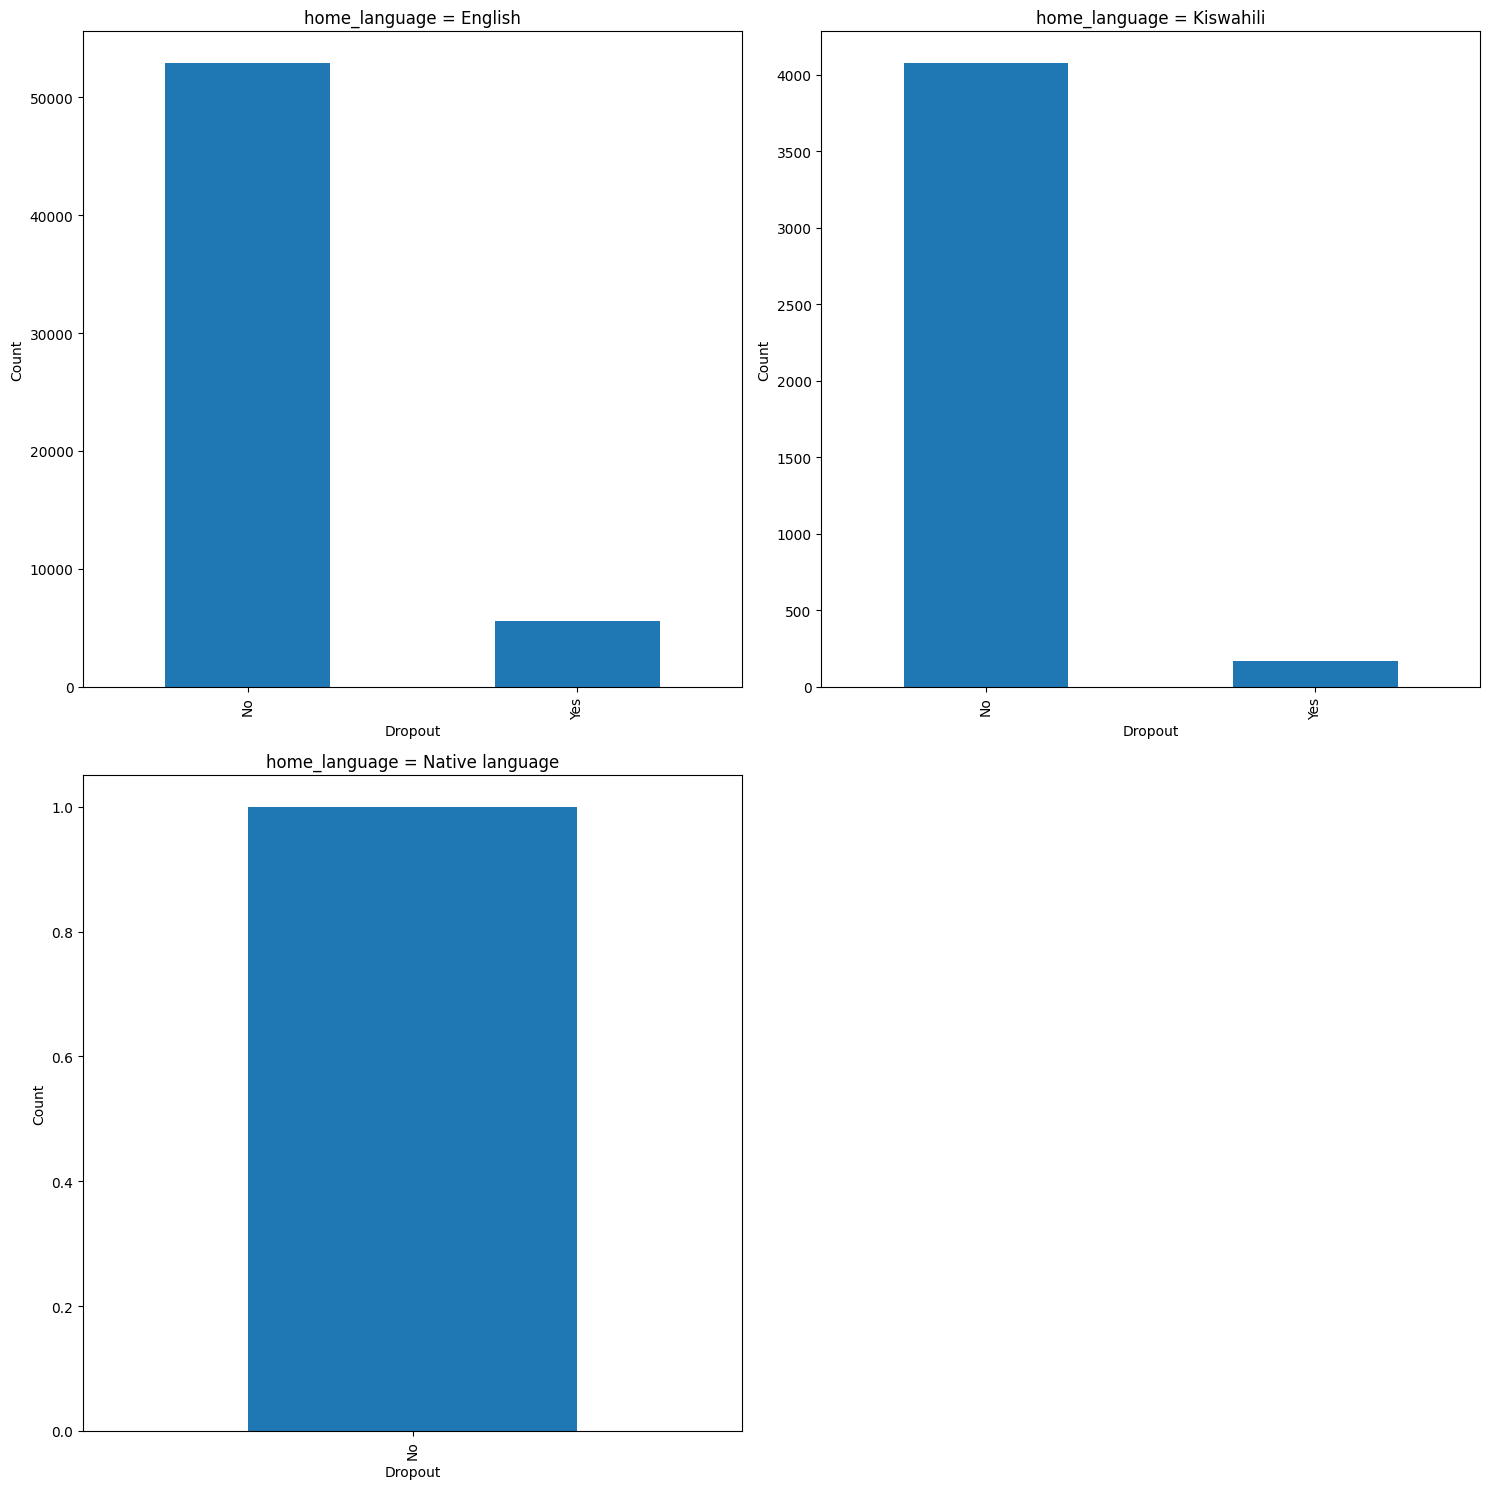

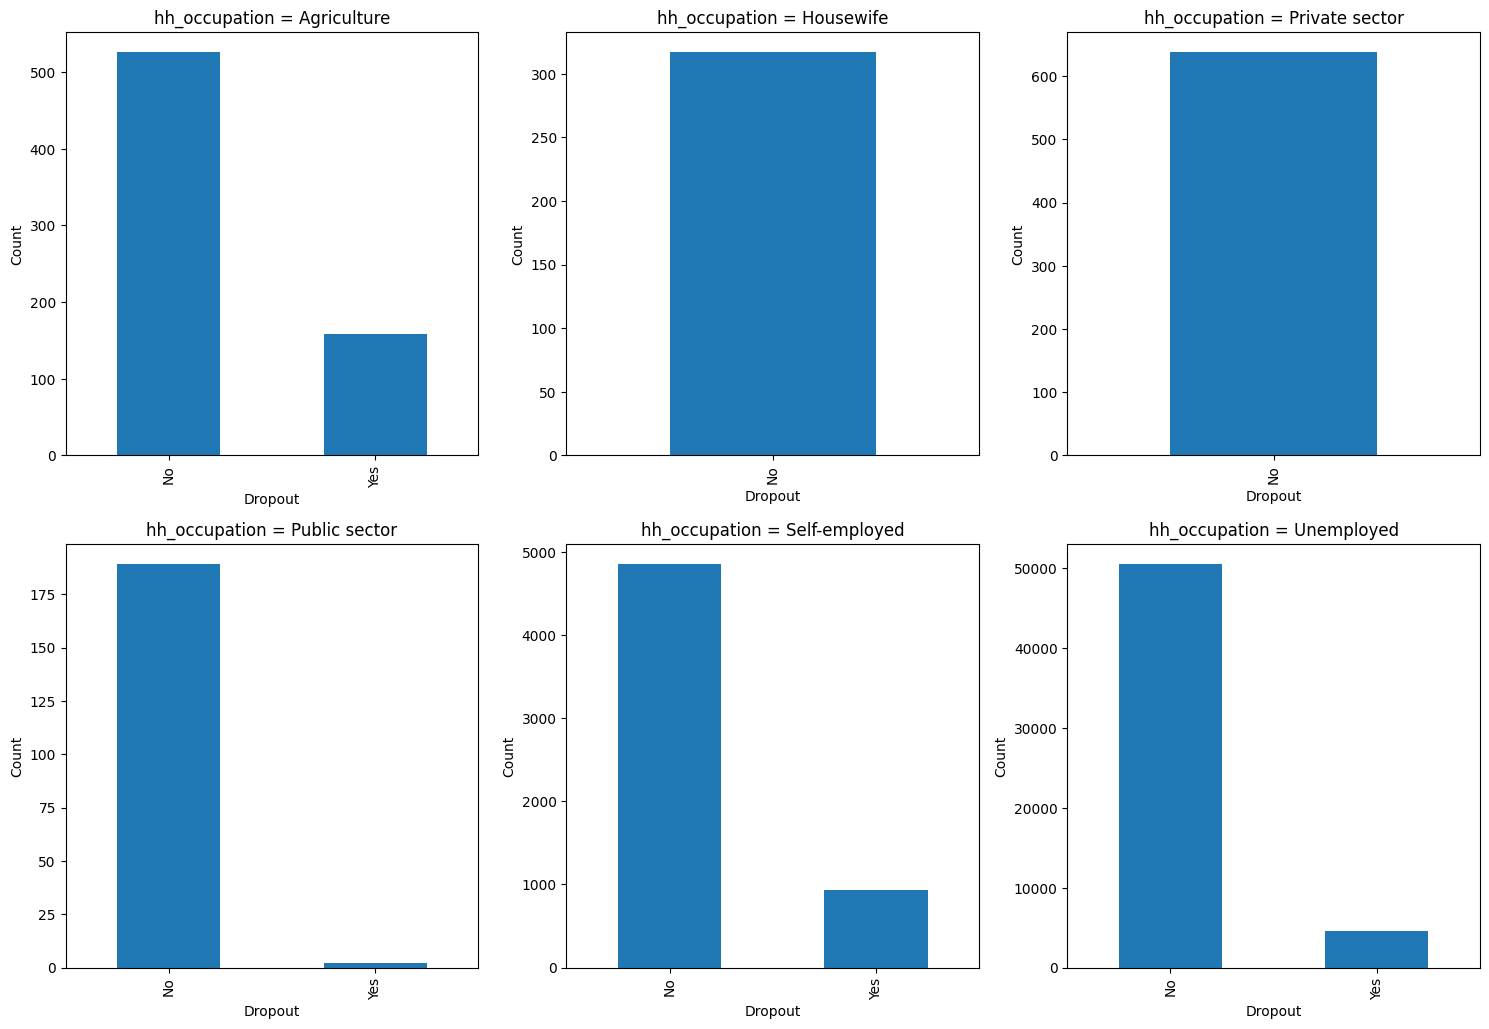

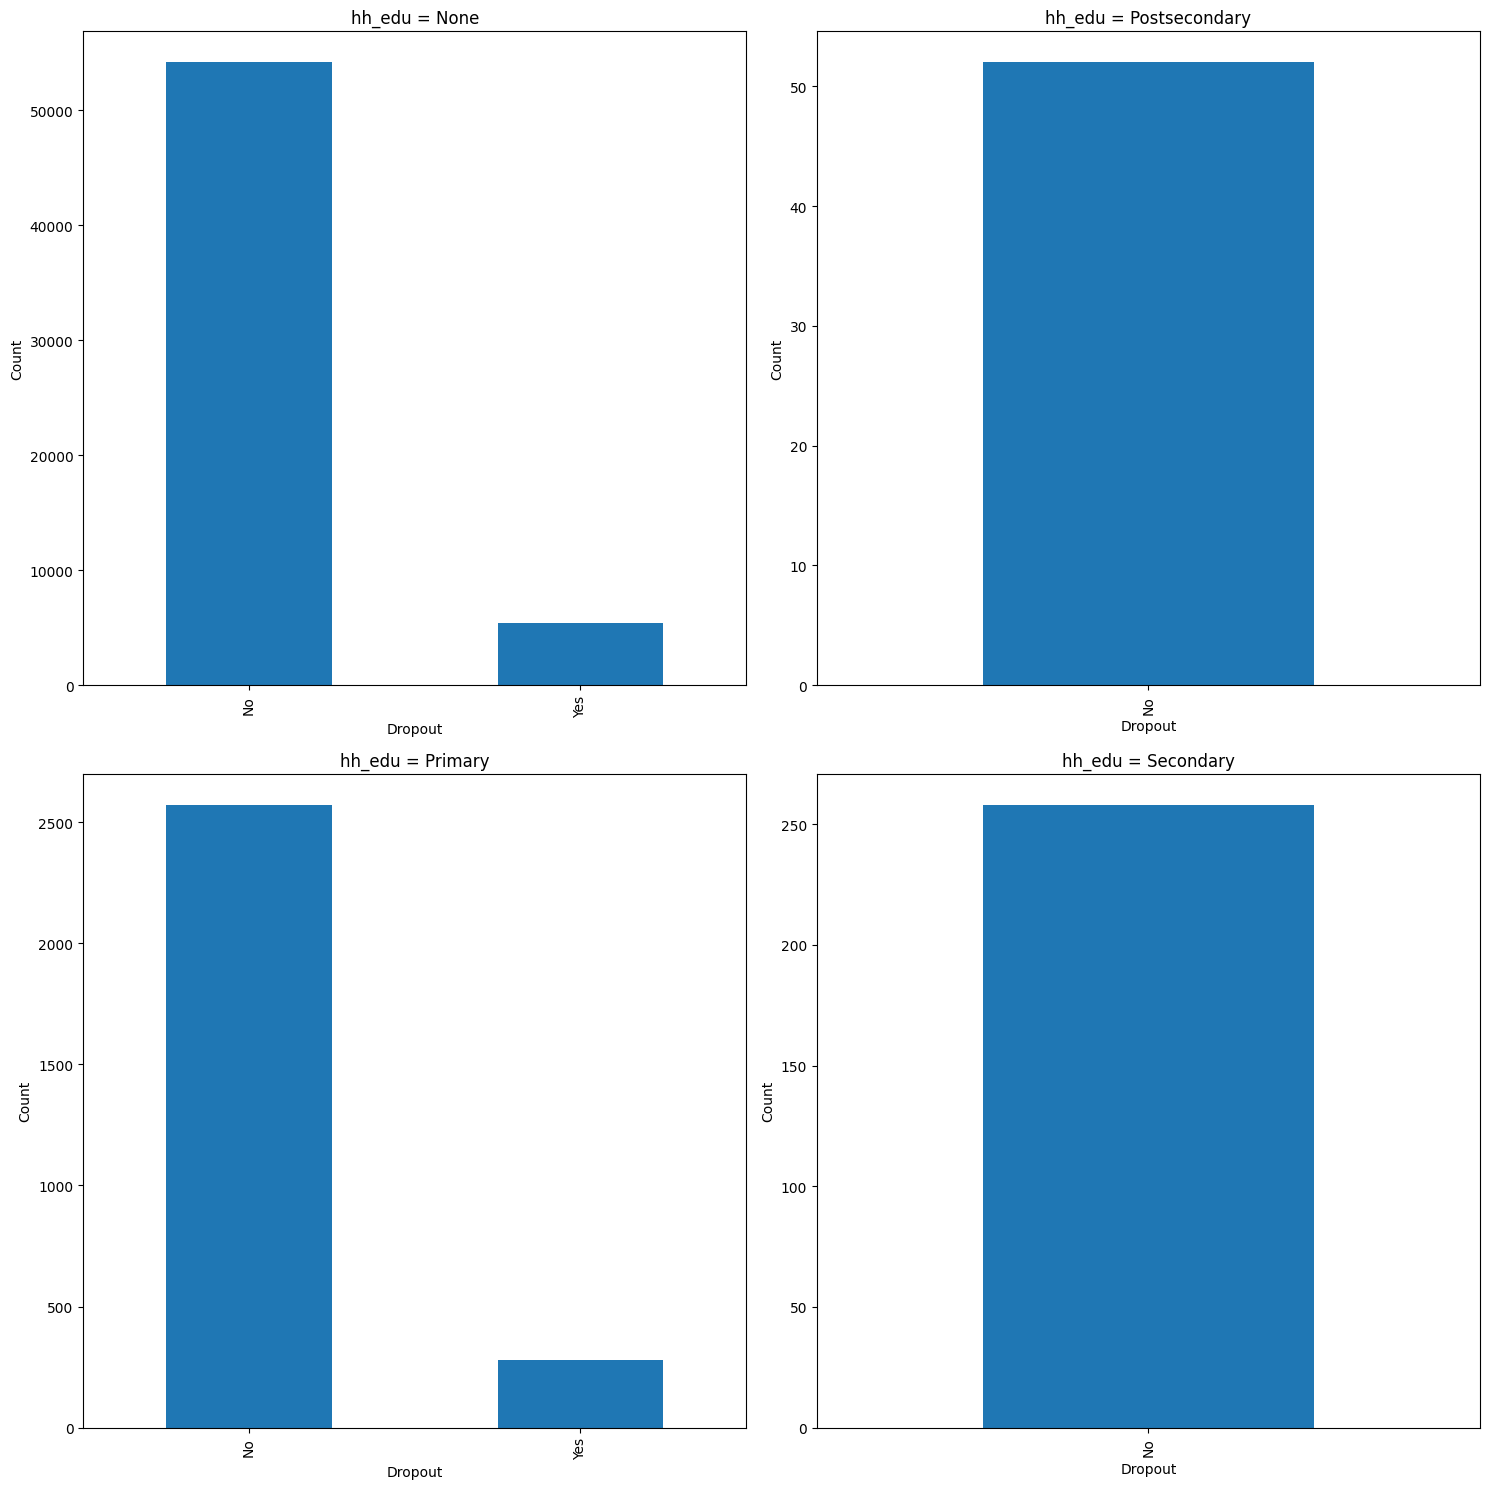

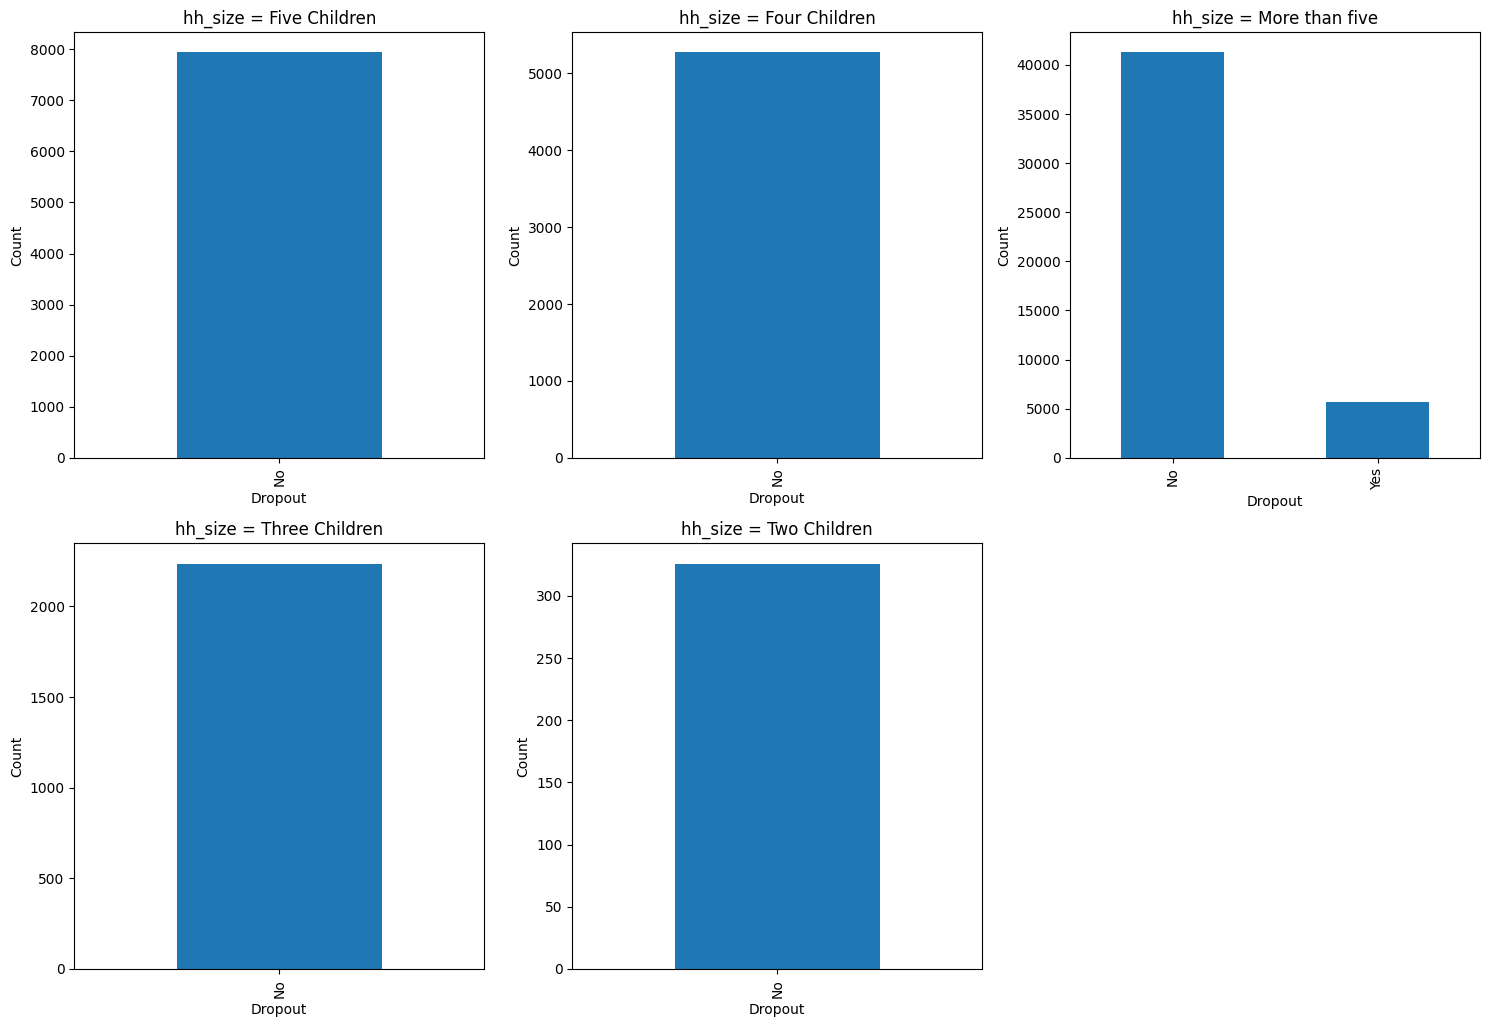

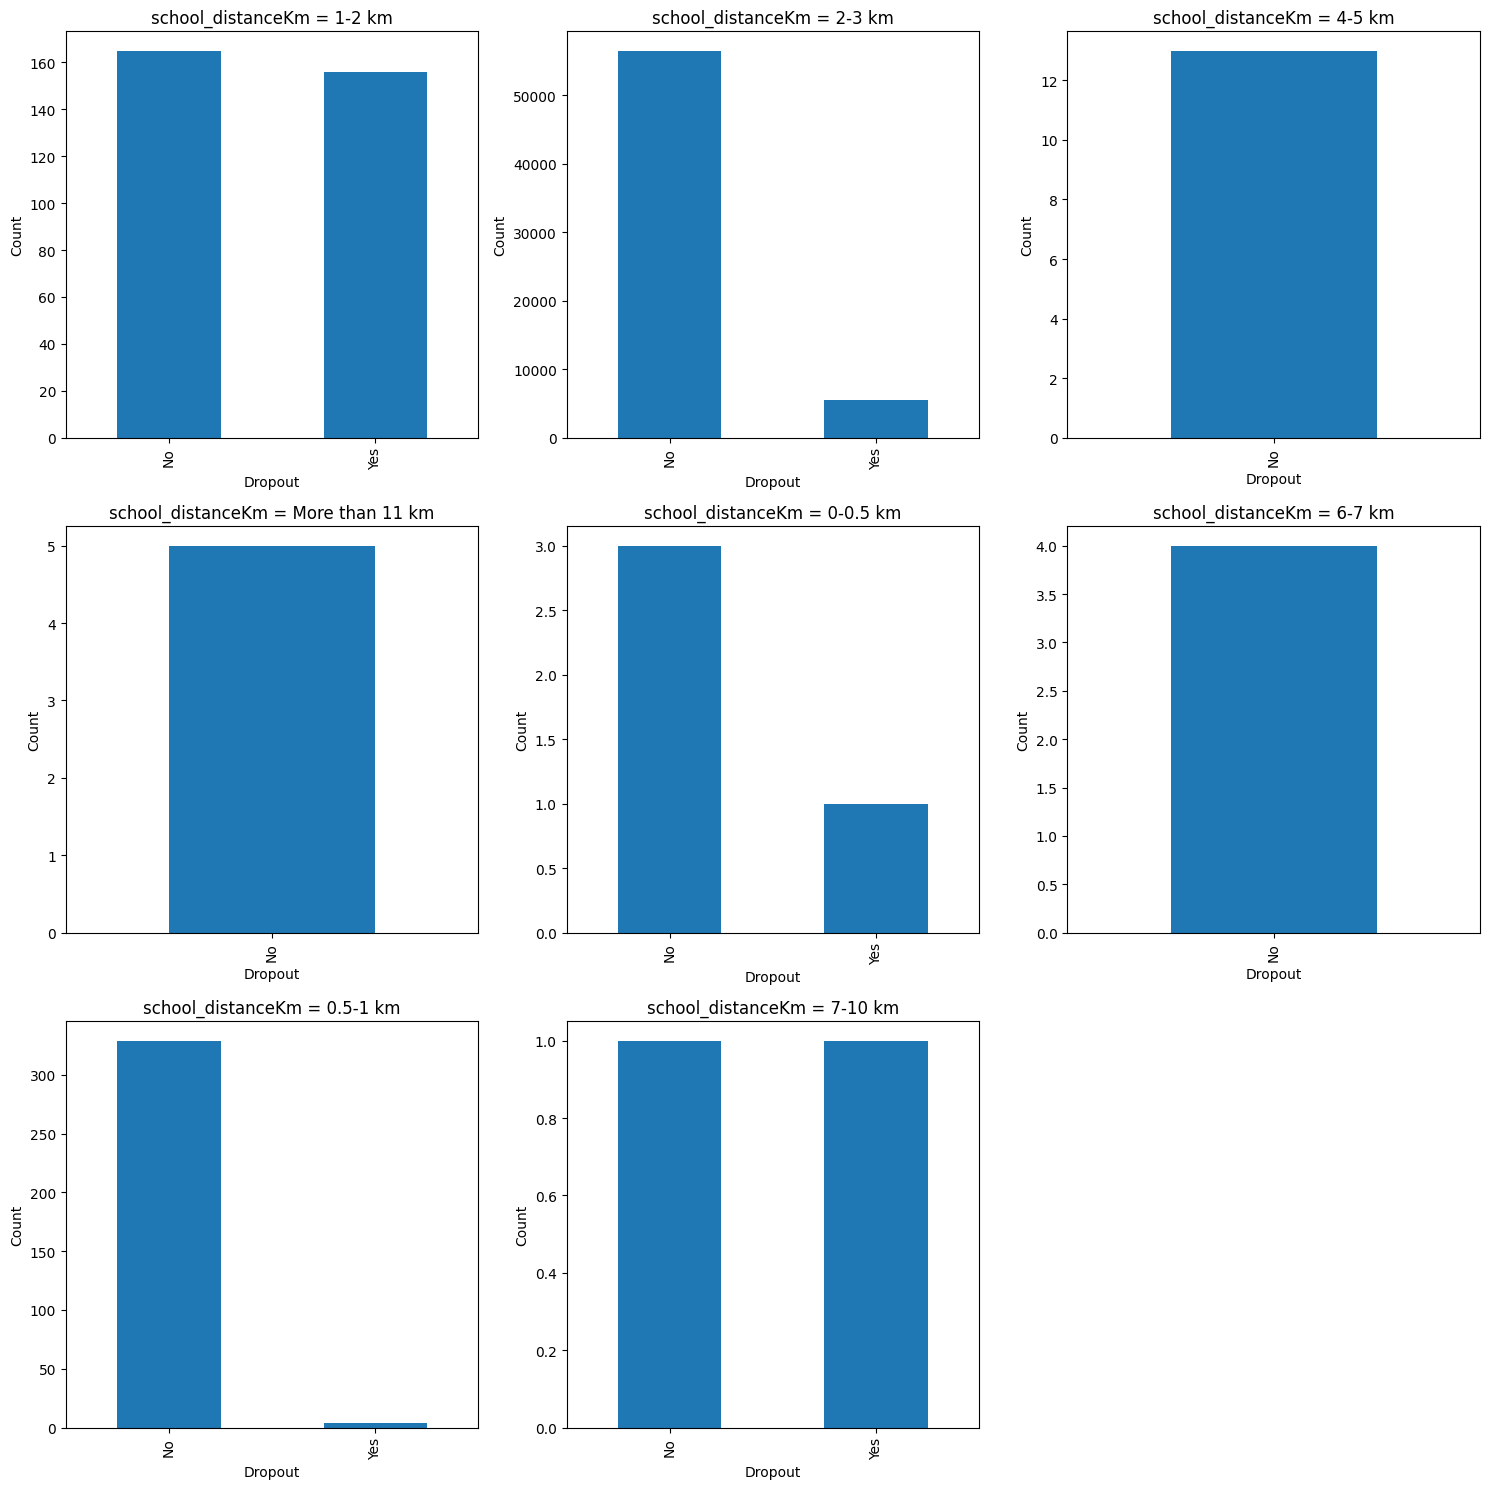

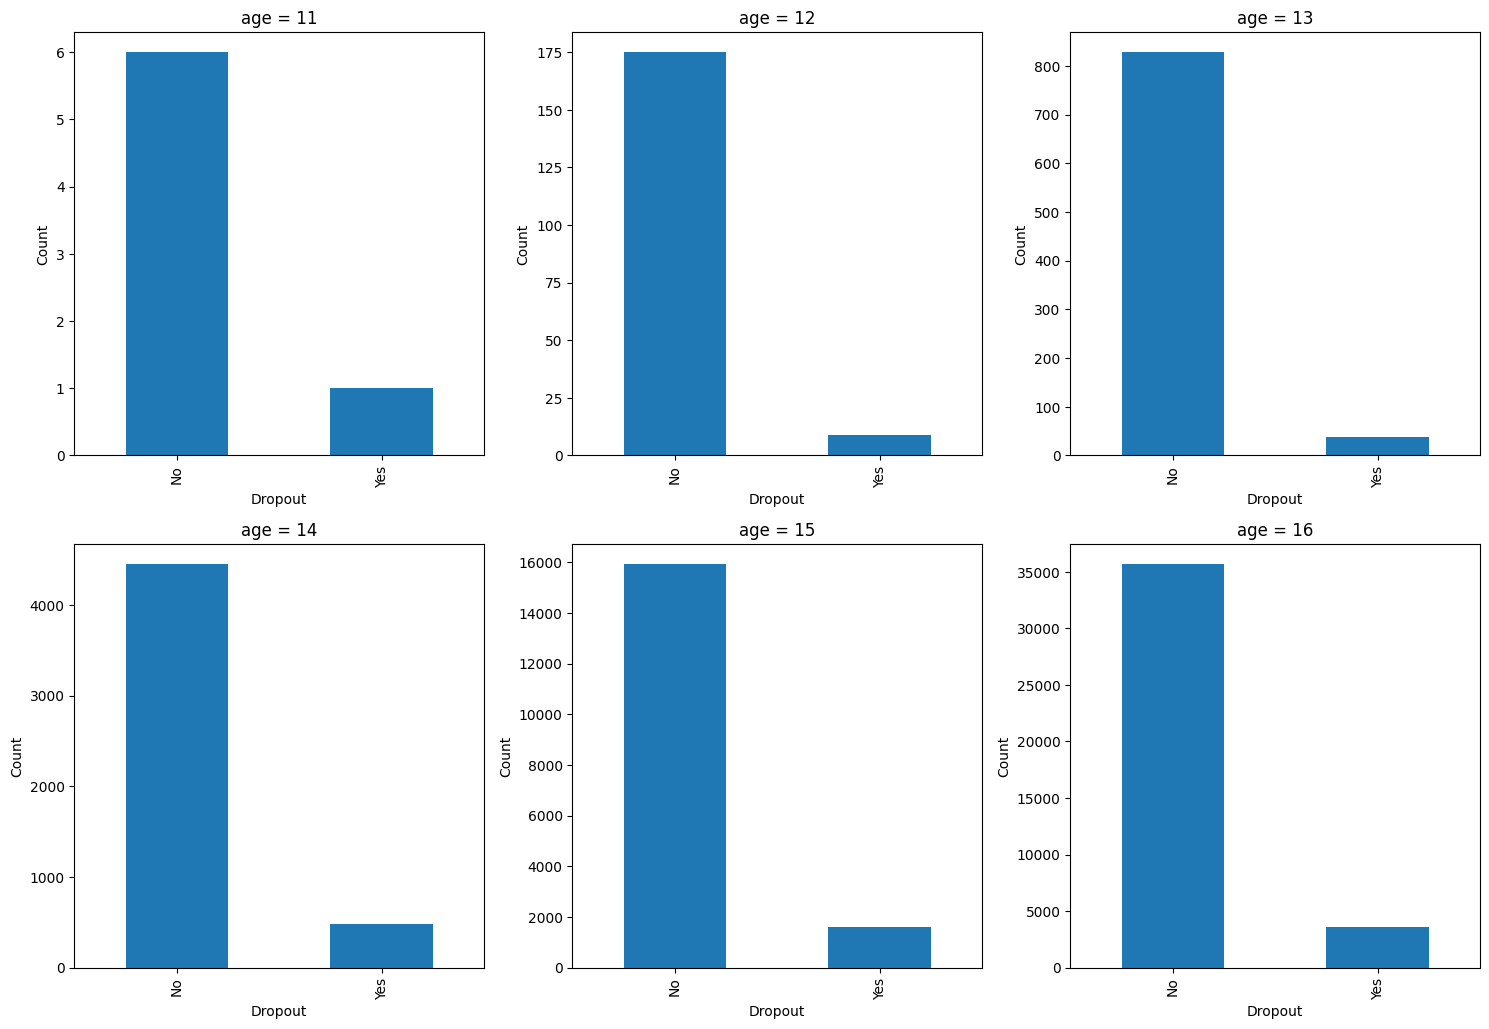

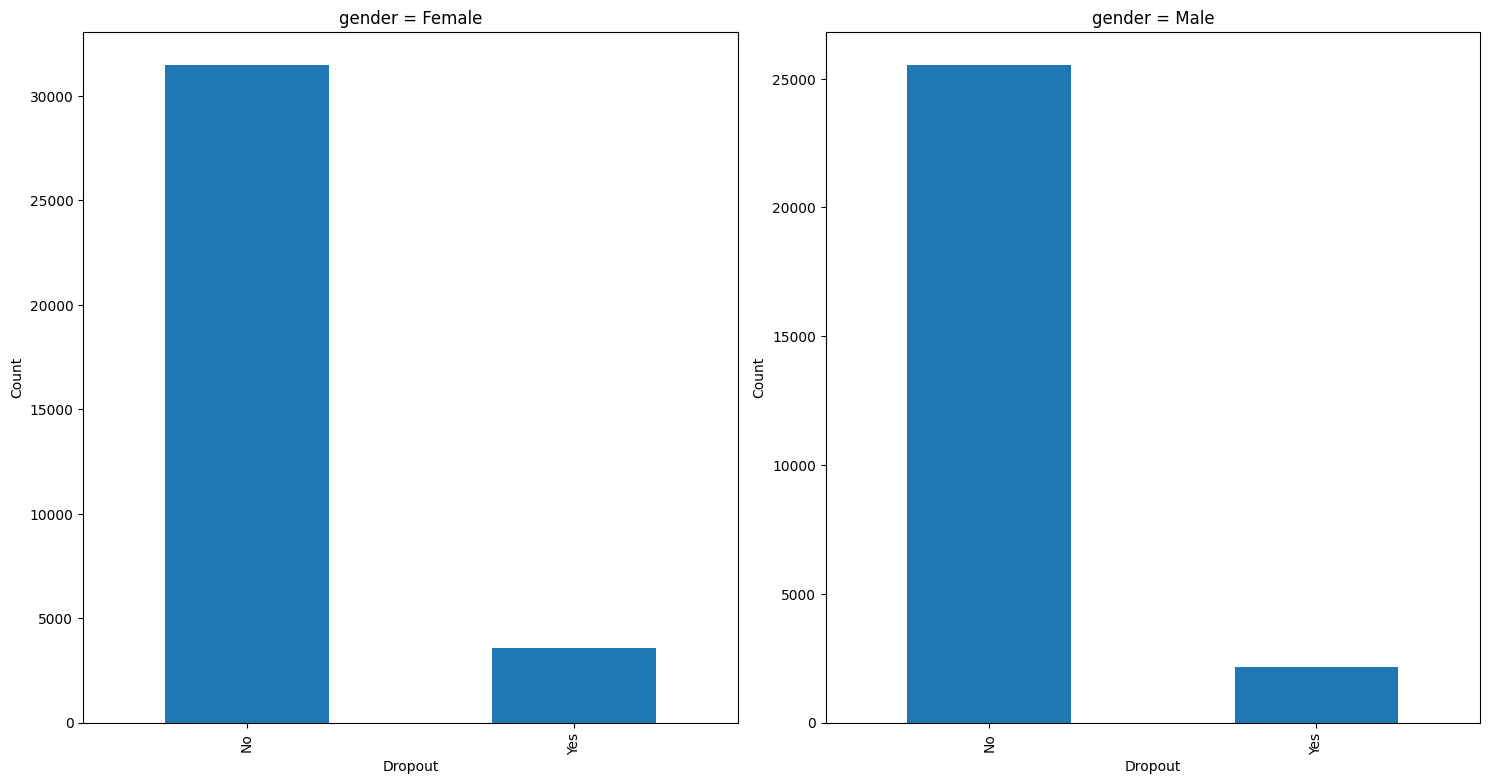

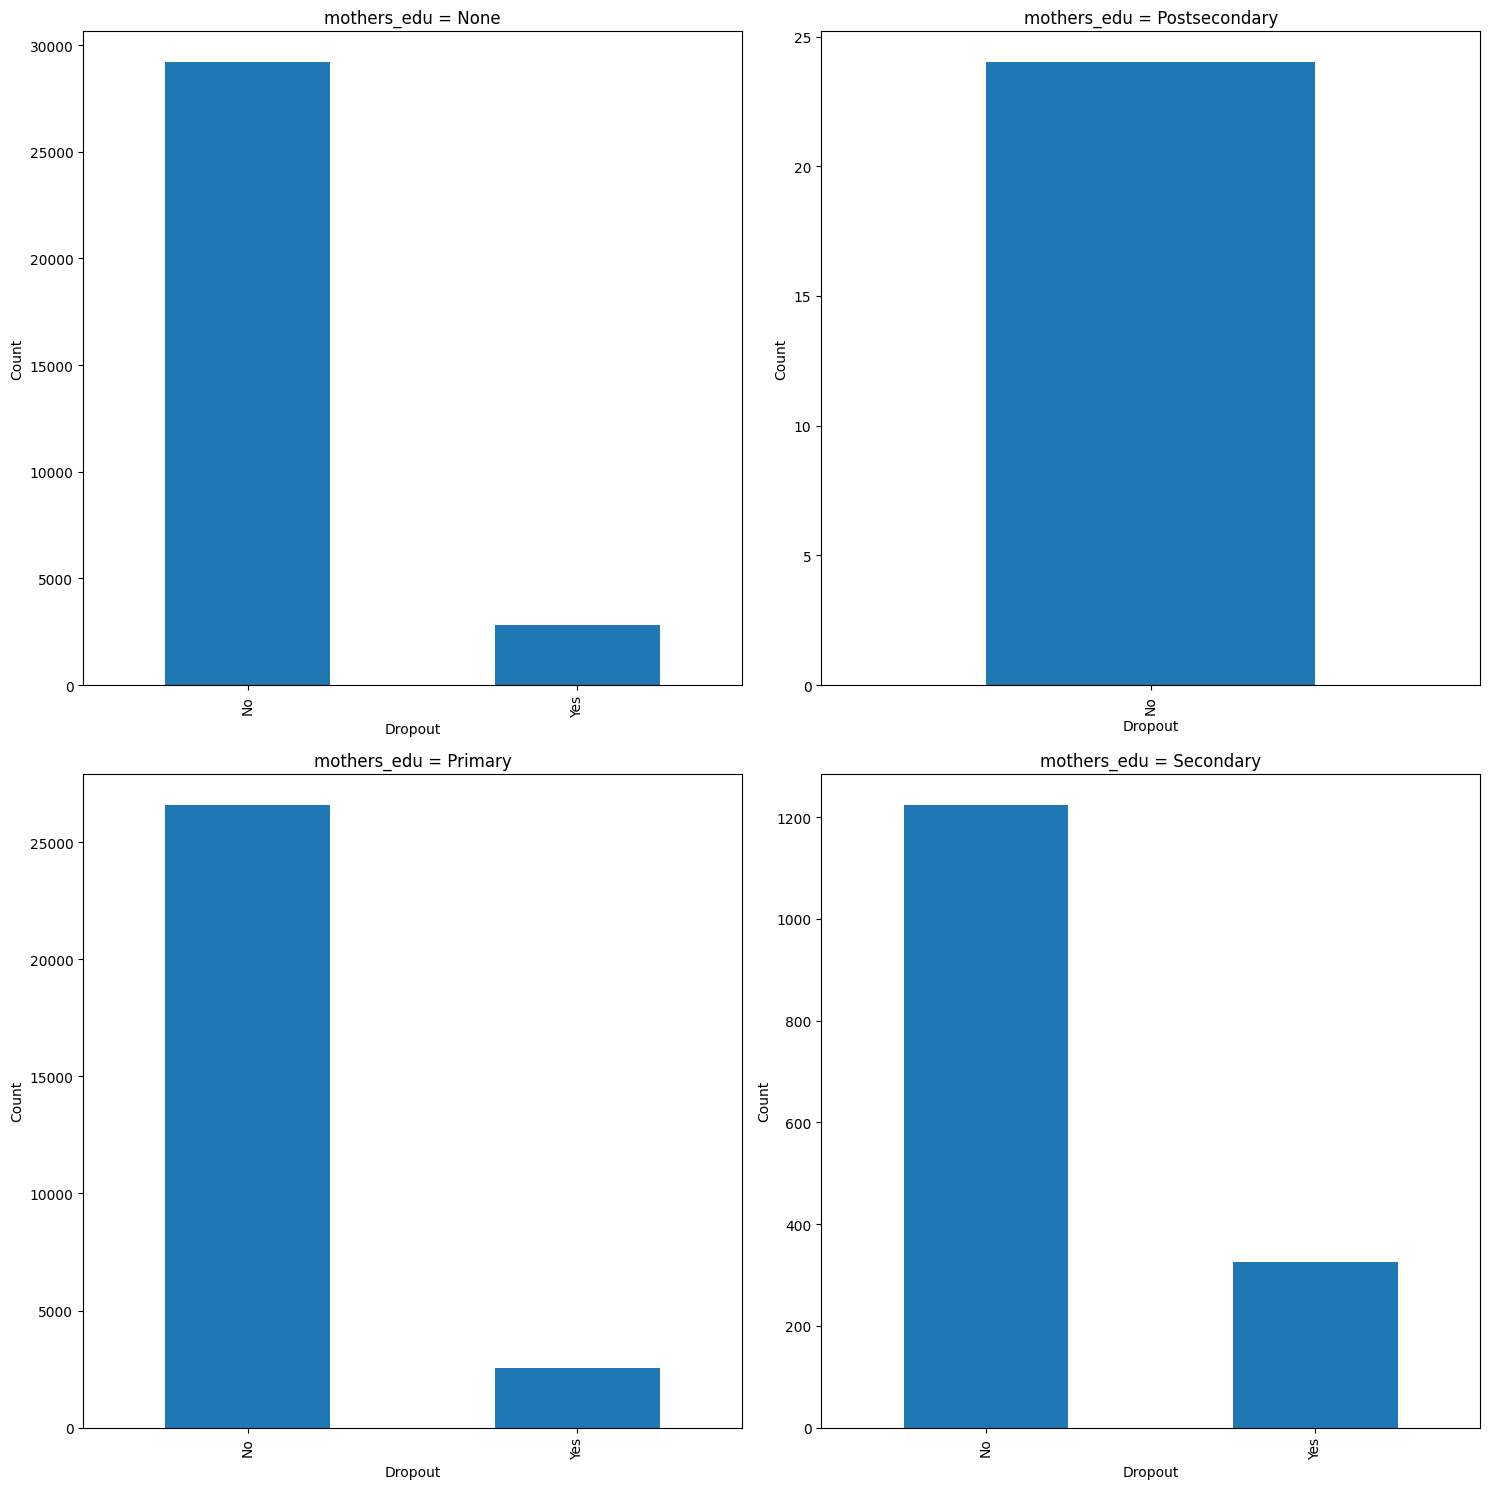

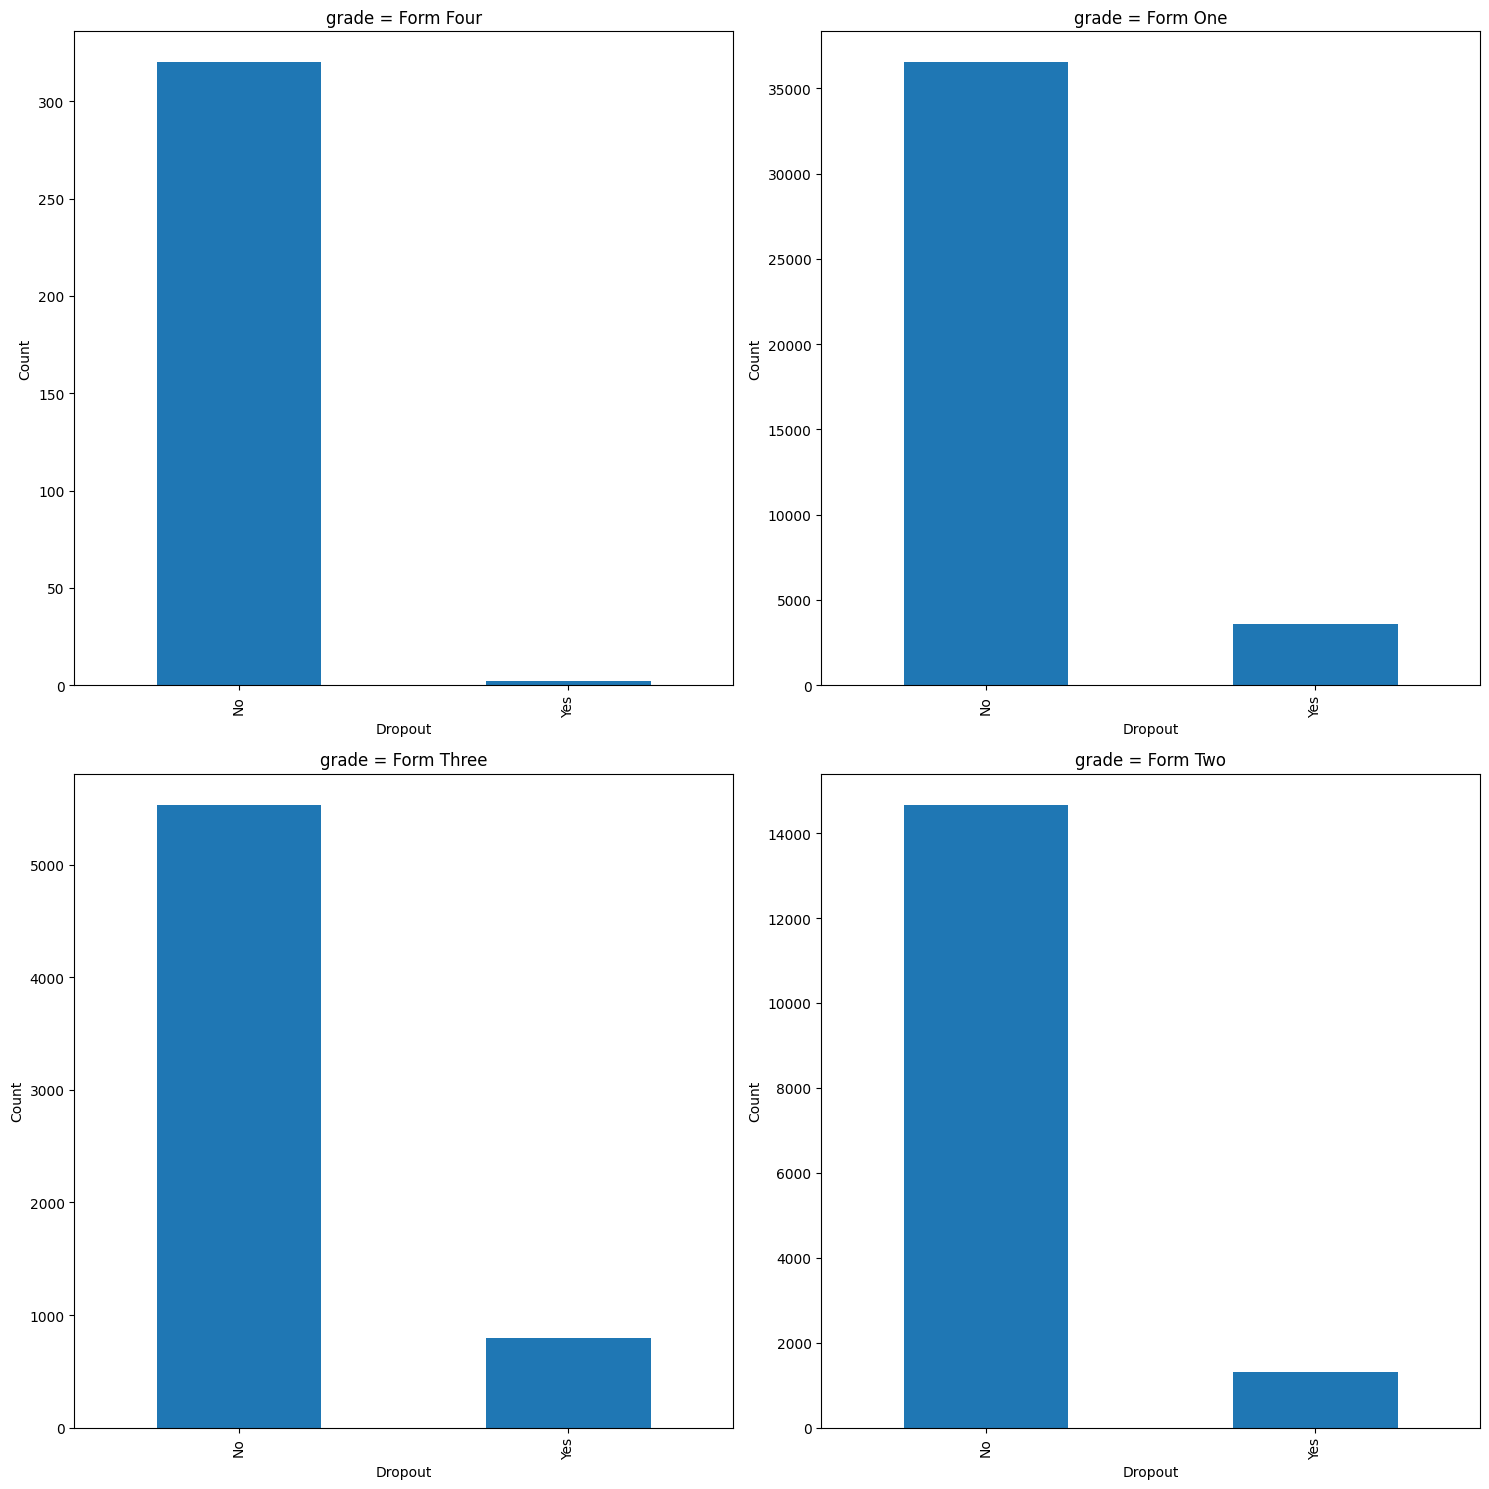

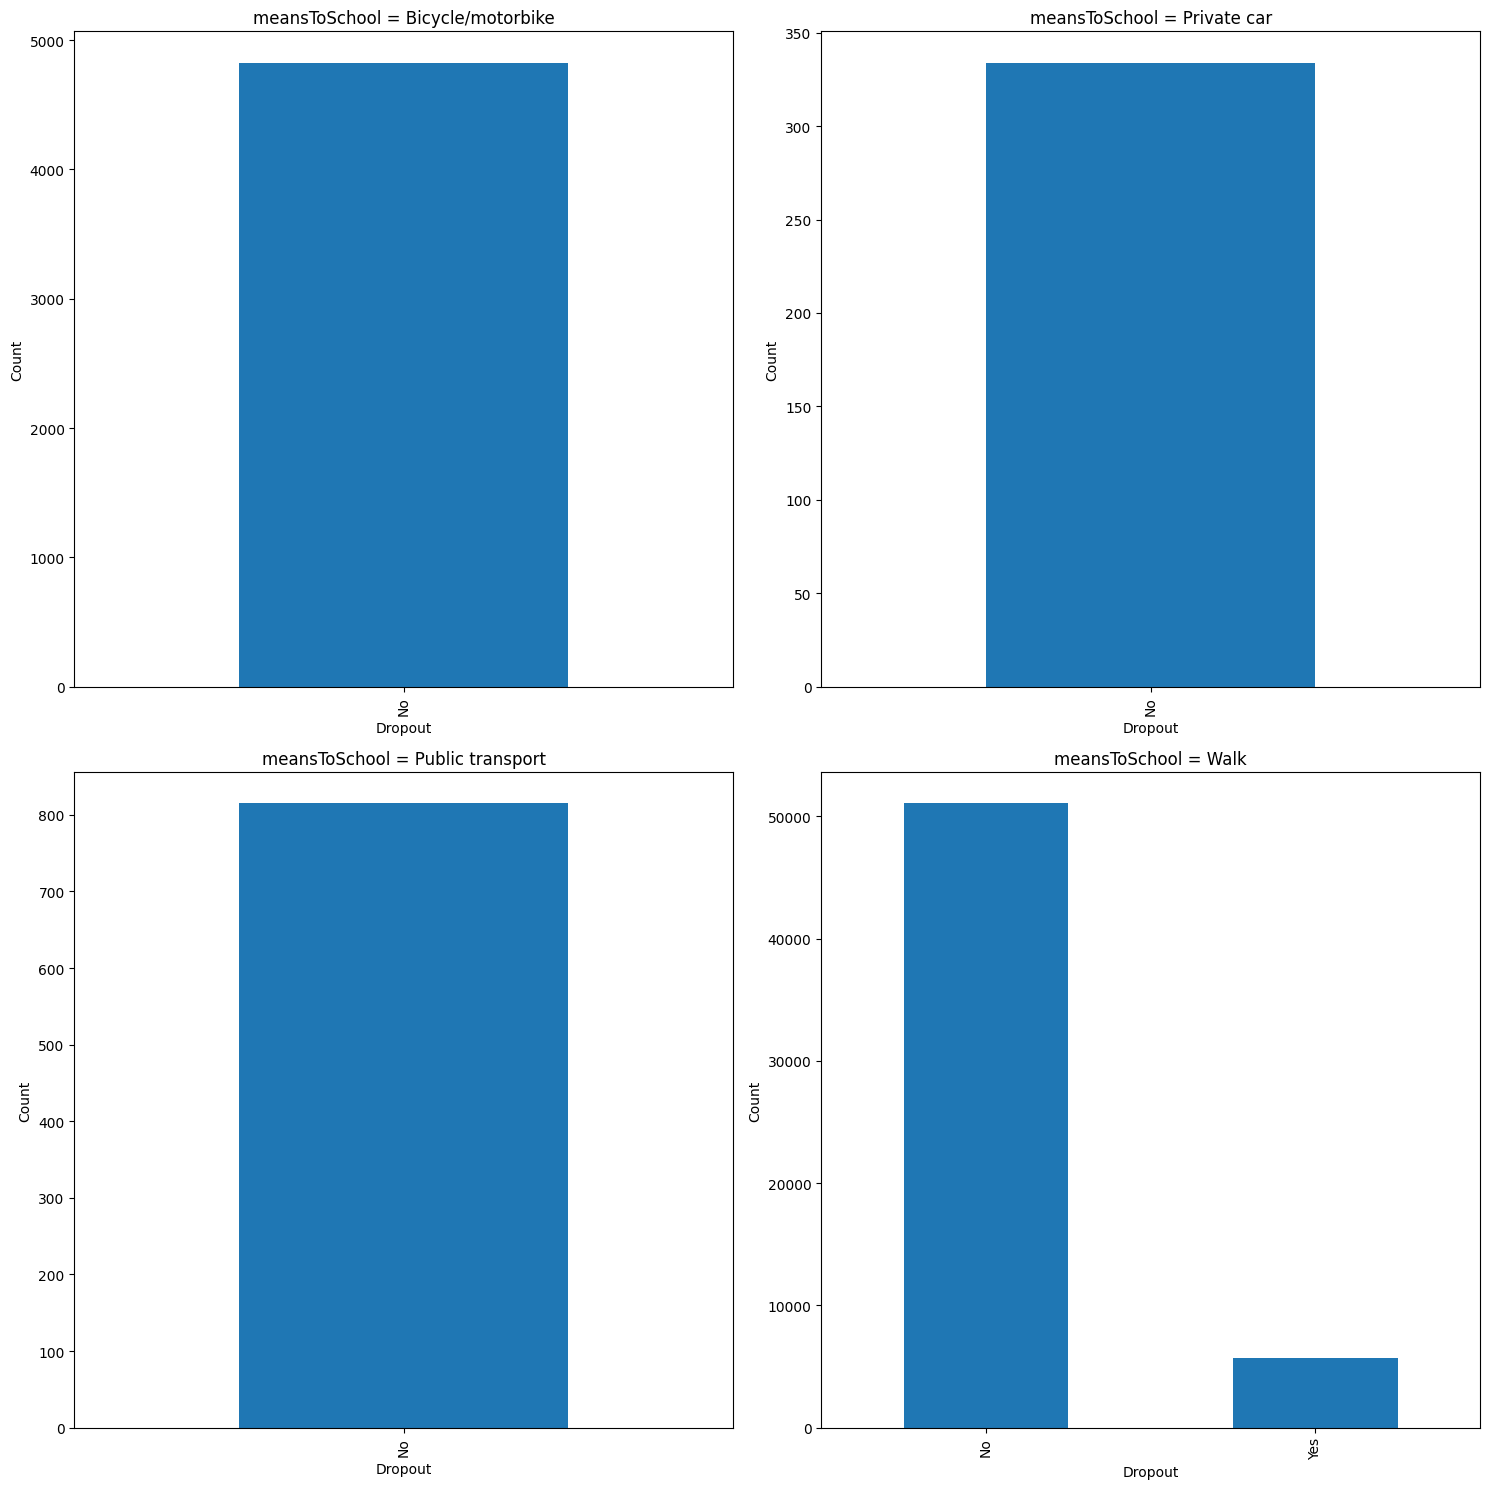

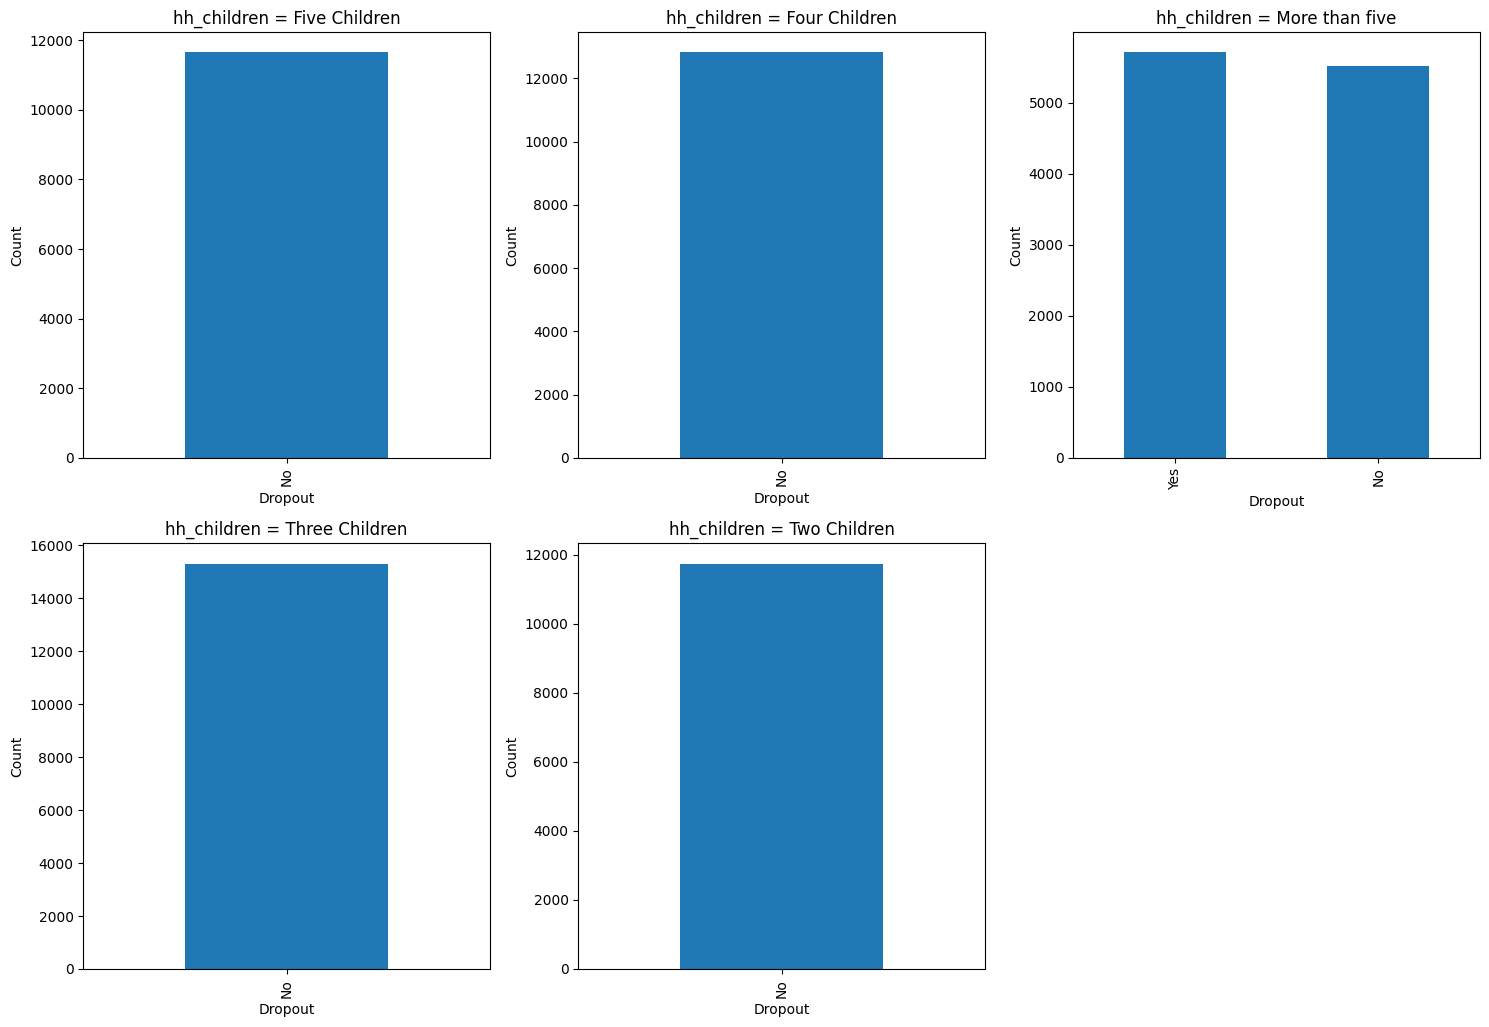

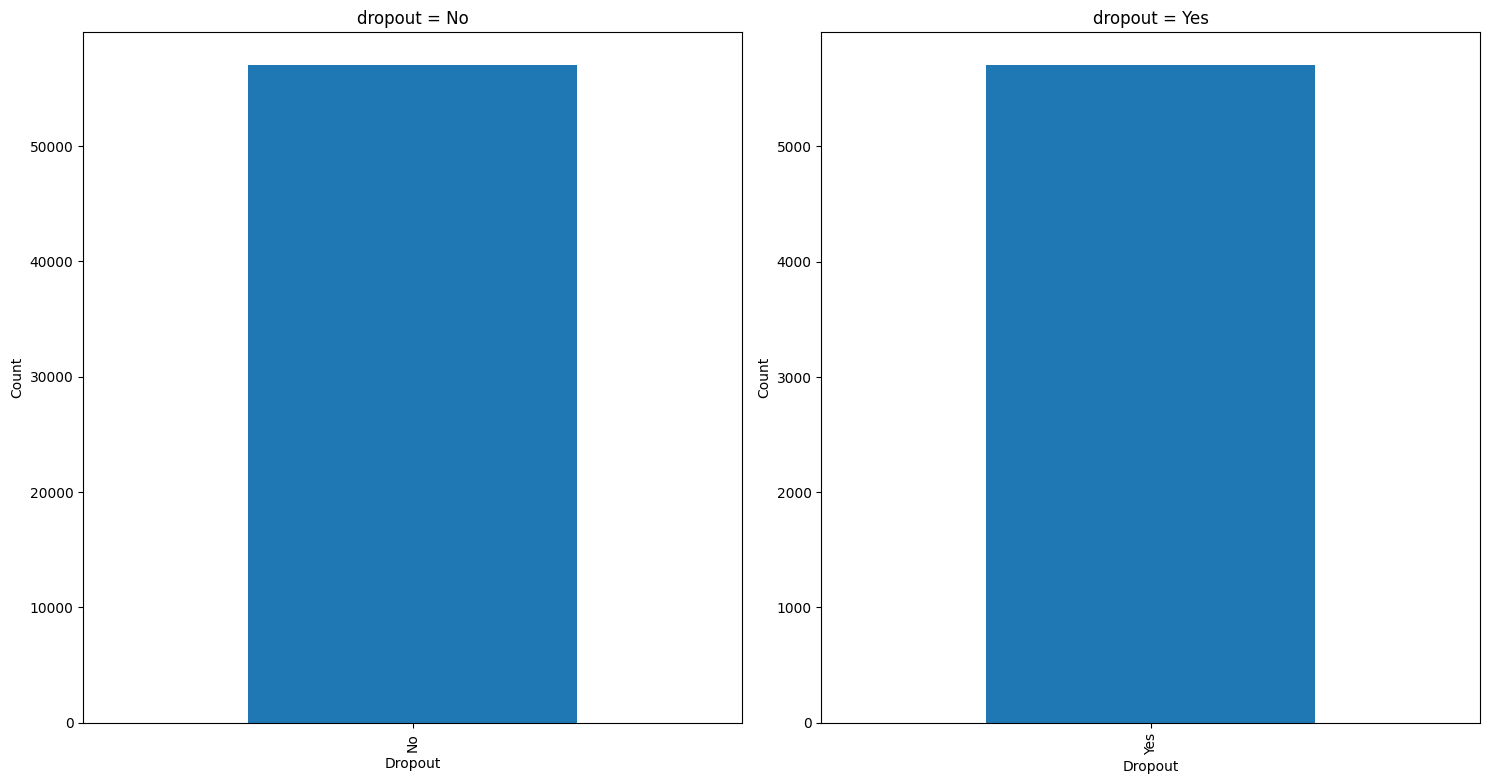

In [95]:
for col in labeled_df.columns:
    plot_count_by_column(labeled_df, col)

In [98]:
labeled_df.to_csv('cleaned_secondary_school_dropout_dataset.csv', index=False)